In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from PIL import Image
from numpy import asarray

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE)
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE)

68616192/68606236 [==============================] - 0s 0us/step
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
# Loading base model dari pre-trained model MobileNet V2

IMG_SHAPE = IMG_SIZE + (3,)
MobileNetV2 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

MobileNetV2.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
# mendefinisikan modelKu

inputs = tf.keras.Input(shape=(160, 160, 3))
x = tf.keras.layers.Rescaling(1./127.5, offset=-1)(inputs)
x = MobileNetV2(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x)

modelKu = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
modelKu.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
# coba performansi model pada validation_dataset sebelum dilakukan proses training

loss0, accuracy0 = modelKu.evaluate(validation_dataset)

32/32 [==============================] - 19s 507ms/step - loss: 0.8032 - accuracy: 0.5190


In [ ]:
# Lakukan proses training

initial_epochs = 5
history = modelKu.fit(train_dataset, epochs=initial_epochs, validation_data=validation_dataset)

Epoch 1/5
63/63 [==============================] - 54s 803ms/step - loss: 0.6317 - accuracy: 0.6590 - val_loss: 0.5084 - val_accuracy: 0.7870
Epoch 2/5
63/63 [==============================] - 51s 813ms/step - loss: 0.4143 - accuracy: 0.8475 - val_loss: 0.3519 - val_accuracy: 0.8830
Epoch 3/5
63/63 [==============================] - 51s 809ms/step - loss: 0.2983 - accuracy: 0.9255 - val_loss: 0.2639 - val_accuracy: 0.9330
Epoch 4/5
63/63 [==============================] - 51s 806ms/step - loss: 0.2324 - accuracy: 0.9435 - val_loss: 0.2121 - val_accuracy: 0.9510
Epoch 5/5
63/63 [==============================] - 52s 826ms/step - loss: 0.1917 - accuracy: 0.9525 - val_loss: 0.1781 - val_accuracy: 0.9570


In [ ]:
MobileNetV2.trainable = True

In [ ]:
for layer in MobileNetV2.layers[:100]:
  layer.trainable = False

In [ ]:
modelKu.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [ ]:
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = modelKu.fit(train_dataset, epochs=total_epochs, initial_epoch=history.epoch[-1], validation_data=validation_dataset)

Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


63/63 [==============================] - 84s 1s/step - loss: 0.0748 - accuracy: 0.9770 - val_loss: 0.0828 - val_accuracy: 0.9670
Epoch 6/10
63/63 [==============================] - 81s 1s/step - loss: 0.0263 - accuracy: 0.9920 - val_loss: 0.0378 - val_accuracy: 0.9830
Epoch 7/10
63/63 [==============================] - 78s 1s/step - loss: 0.0147 - accuracy: 0.9955 - val_loss: 0.0352 - val_accuracy: 0.9850
Epoch 8/10
63/63 [==============================] - 78s 1s/step - loss: 0.0066 - accuracy: 0.9990 - val_loss: 0.0377 - val_accuracy: 0.9860
Epoch 9/10
63/63 [==============================] - 76s 1s/step - loss: 0.0034 - accuracy: 0.9995 - val_loss: 0.0401 - val_accuracy: 0.9840
Epoch 10/10
63/63 [==============================] - 77s 1s/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0475 - val_accuracy: 0.9800


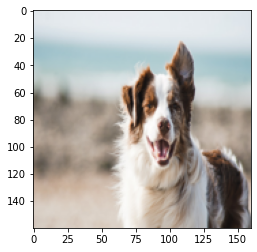

In [ ]:
gbr = Image.open('coba6.jpg')
gbr = gbr.convert('RGB')
gbr = gbr.resize((160,160))
gbr = asarray(gbr)

plt.imshow(gbr)

In [ ]:
gbr=np.expand_dims(gbr, axis=0)

In [ ]:
p=modelKu(gbr)

In [ ]:
p=np.round(p)

In [ ]:
p

array([[1.]], dtype=float32)

Berikut ini adalah langkah untuk training juga sebagian dari Mobilenet V2

In [ ]:
MobileNetV2.trainable = True

In [ ]:
print("Jumlah layer pada base model: ", len(MobileNetV2.layers))

Jumlah layer pada base model:  154


In [ ]:
# jika kita ingin untuk train ulang layer 100 ke atas, 
# sedangkan layer awal sampai layer 100 tidak ditrain ulang

for layer in MobileNetV2.layers[:100]:
  layer.trainable = False

In [ ]:
modelKu.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = modelKu.fit(train_dataset, epochs=total_epochs, initial_epoch=history.epoch[-1], validation_data=validation_dataset)

Epoch 5/15
63/63 [==============================] - 16s 134ms/step - loss: 0.0747 - accuracy: 0.9695 - val_loss: 0.0540 - val_accuracy: 0.9780
Epoch 6/15
63/63 [==============================] - 7s 114ms/step - loss: 0.0370 - accuracy: 0.9865 - val_loss: 0.0415 - val_accuracy: 0.9860
Epoch 7/15
63/63 [==============================] - 8s 115ms/step - loss: 0.0177 - accuracy: 0.9945 - val_loss: 0.0688 - val_accuracy: 0.9730
Epoch 8/15
63/63 [==============================] - 8s 116ms/step - loss: 0.0126 - accuracy: 0.9960 - val_loss: 0.0384 - val_accuracy: 0.9860
Epoch 9/15
63/63 [==============================] - 7s 114ms/step - loss: 0.0059 - accuracy: 0.9995 - val_loss: 0.0429 - val_accuracy: 0.9860
Epoch 10/15
63/63 [==============================] - 8s 117ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0545 - val_accuracy: 0.9860
Epoch 11/15
63/63 [==============================] - 7s 114ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0477 - val_accuracy: 0.9870
Epo

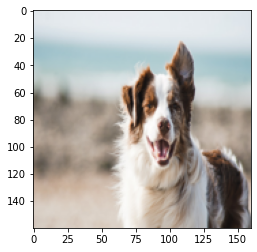

In [ ]:
gbr = Image.open('coba6.jpg')
gbr = gbr.convert('RGB')
gbr = gbr.resize((160,160))
gbr = asarray(gbr)

plt.imshow(gbr)

In [ ]:
gbr=np.expand_dims(gbr, axis=0)

In [ ]:
prediksi=modelKu(gbr)

In [ ]:
p=np.round(prediksi)

In [ ]:
p

array([[1.]], dtype=float32)



---
# Bagian berikut ini hanya untuk menampilkan data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


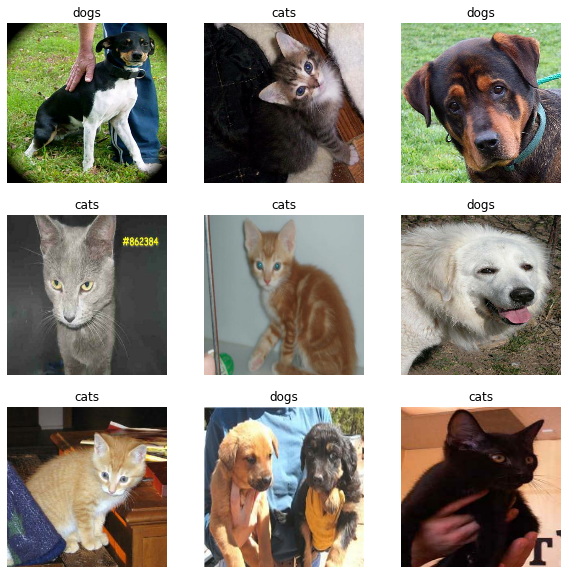

In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(3):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

'dogs'

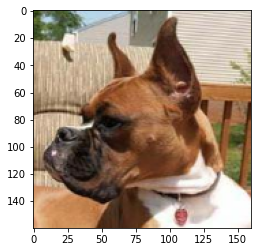

In [ ]:
class_names = train_dataset.class_names

for images, labels in train_dataset.take(1):  # only take first element of dataset
    images = images.numpy()
    labels = labels.numpy()

plt.imshow(images[0].astype("uint8"))
labels[0]
class_names[labels[0]]

In [ ]:
print('Number of training batches: %d' % tf.data.experimental.cardinality(train_dataset))
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
#print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of training batches: 63
Number of validation batches: 26
Number of test batches: 6


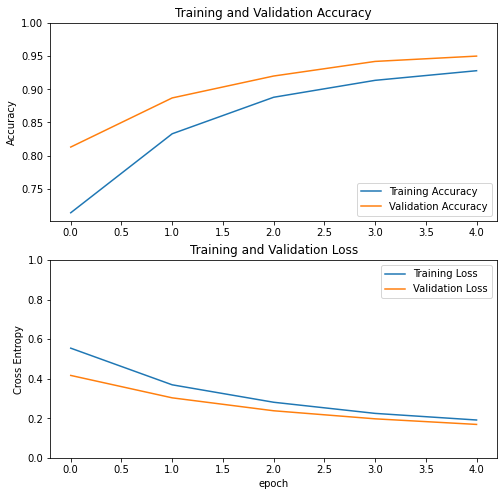

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

FINE TUNING

In [ ]:
len(model.trainable_variables)

56

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

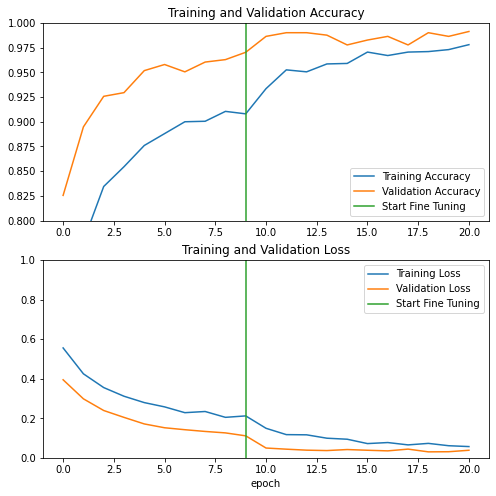

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

6/6 [==============================] - 4s 529ms/step - loss: 0.0399 - accuracy: 0.9792
Test accuracy : 0.9791666865348816


Predictions:
 [0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0]
Labels:
 [0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0]


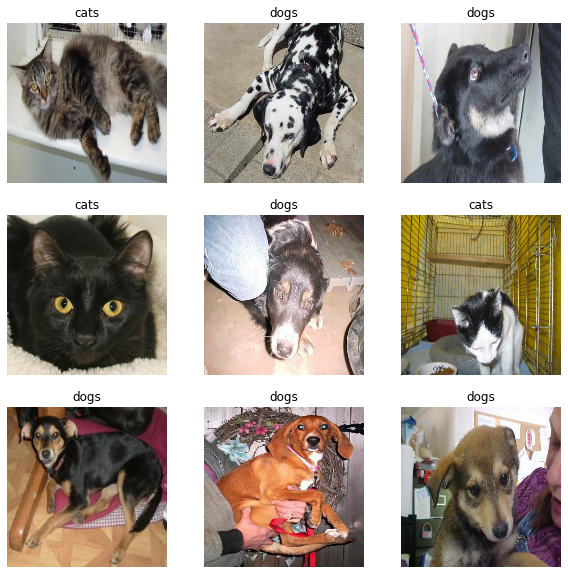

In [ ]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")